In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lF4WWBfpPqdSfI9D4y5k")
project = rf.workspace("dataset-uutxr").project("cctv-naxyo")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cctv-2 in yolov11:: 100%|██████████| 7486/7486 [00:01<00:00, 5778.83it/s]


In [2]:
!nvidia-smi

Tue Aug  5 14:35:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.7/112.6 GB disk)


In [5]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/cctv-2/train/images/-2018_jpg.rf.2081519c9d2761b1f50a6375774f148b.jpg' save=True

100% 5.35M/5.35M [00:00<00:00, 108MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/cctv-2/train/images/-2018_jpg.rf.2081519c9d2761b1f50a6375774f148b.jpg: 640x640 11 persons, 17.8ms
Speed: 11.5ms preprocess, 17.8ms inference, 646.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


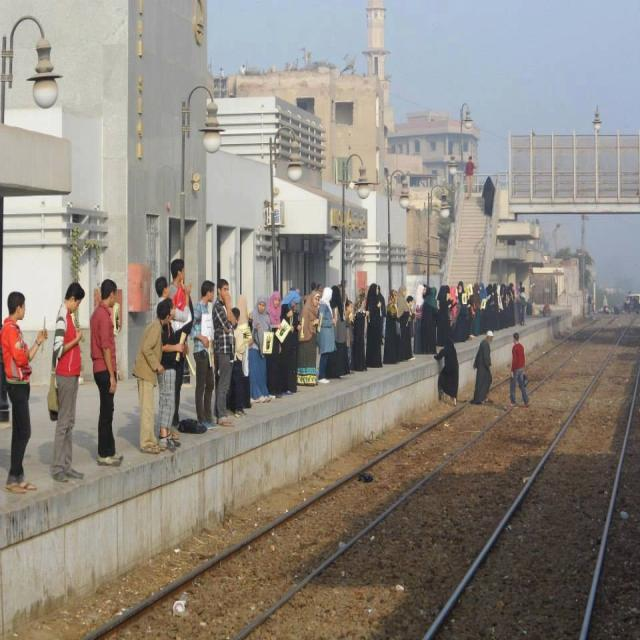

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/cctv-2/train/images/-2018_jpg.rf.2081519c9d2761b1f50a6375774f148b.jpg', width=600)

In [8]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open("/content/cctv-2/train/images/-2018_jpg.rf.2081519c9d2761b1f50a6375774f148b.jpg")
result = model.predict(image, conf=0.25)[0]


0: 640x640 11 persons, 8.3ms
Speed: 2.9ms preprocess, 8.3ms inference, 144.0ms postprocess per image at shape (1, 3, 640, 640)


In [9]:
result.boxes.xyxy

tensor([[1.1812e-01, 2.9011e+02, 3.8515e+01, 4.9276e+02],
        [8.8447e+01, 2.7834e+02, 1.2250e+02, 4.6508e+02],
        [4.7013e+02, 3.3085e+02, 4.9308e+02, 4.0507e+02],
        [5.0539e+01, 2.8375e+02, 8.7048e+01, 4.8109e+02],
        [5.0845e+02, 3.3207e+02, 5.3017e+02, 4.0754e+02],
        [1.3162e+02, 2.9897e+02, 1.9018e+02, 4.5448e+02],
        [1.5327e+02, 2.9907e+02, 1.9120e+02, 4.4738e+02],
        [4.3260e+02, 2.9439e+02, 4.6032e+02, 4.0608e+02],
        [2.1373e+02, 2.7829e+02, 2.4364e+02, 4.1982e+02],
        [2.4847e+02, 2.9709e+02, 2.7323e+02, 4.0241e+02],
        [1.9077e+02, 2.7963e+02, 2.1891e+02, 4.3093e+02]], device='cuda:0')

In [10]:
result.boxes.conf


tensor([0.7863, 0.6967, 0.6594, 0.6365, 0.6361, 0.5912, 0.4013, 0.3871, 0.3314, 0.3247, 0.3184], device='cuda:0')

In [11]:
result.boxes.cls

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [12]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

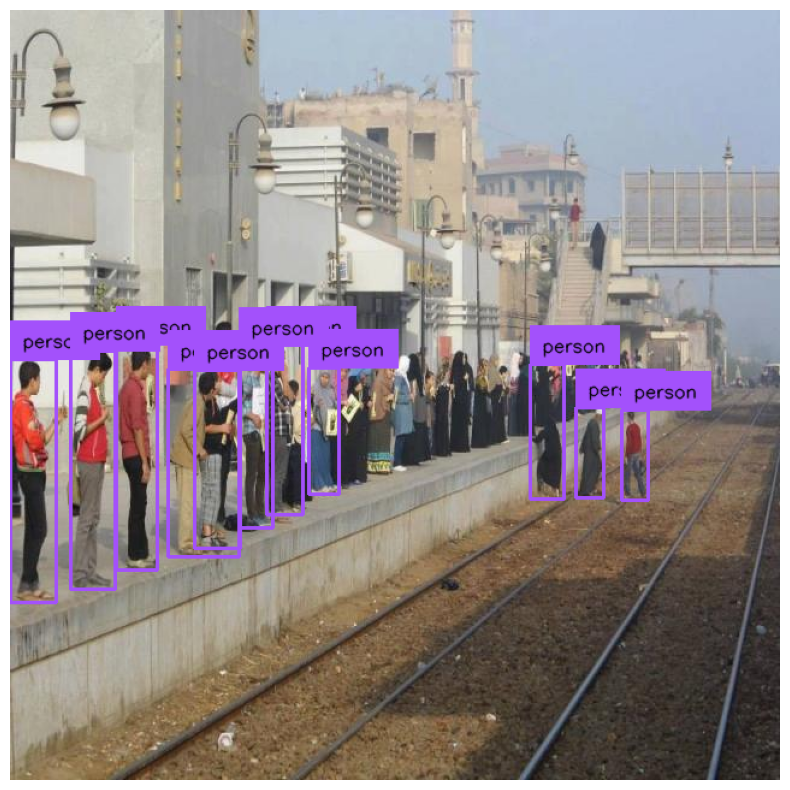

In [13]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [14]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lF4WWBfpPqdSfI9D4y5k")
project = rf.workspace("dataset-uutxr").project("cctv-naxyo")
version = project.version(2)
dataset = version.download("yolov11")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cctv-2 in yolov11:: 100%|██████████| 7486/7486 [00:01<00:00, 6207.74it/s]


In [15]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 143MB/s]
New https://pypi.org/project/ultralytics/8.3.174 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/cctv-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

In [16]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1754404884.fd7aebbb8e37.1813.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


In [17]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/cctv-2/valid/labels.cache... 526 images, 4 backgrounds, 0 corrupt: 100% 526/526 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [00:07<00:00,  4.21it/s]
                   all        526       1677      0.834       0.73      0.818      0.501
Speed: 0.9ms preprocess, 9.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [18]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/151 /content/datasets/cctv-2/test/images/00381_jpg.rf.c5a0d5198451a24f7eea1538ea03464e.jpg: 640x640 2 persons, 15.6ms
image 2/151 /content/datasets/cctv-2/test/images/00390_jpg.rf.3a8dfac3312b6c28e32fea9768e4763b.jpg: 640x640 1 person, 15.3ms
image 3/151 /content/datasets/cctv-2/test/images/00420_jpg.rf.3abb411712f7969355fef6b2ba4ca737.jpg: 640x640 1 person, 15.2ms
image 4/151 /content/datasets/cctv-2/test/images/00505_jpg.rf.dcf5e37cf9f8cc974a2d0e5566cd34ae.jpg: 640x640 2 persons, 15.2ms
image 5/151 /content/datasets/cctv-2/test/images/00539_jpg.rf.5e269a178d6ff73995c045095c778f2b.jpg: 640x640 1 person, 15.2ms
image 6/151 /content/datasets/cctv-2/test/images/00566_jpg.rf.71416cca40141bf0e57c6ab55f3ded91.jpg: 640x640 1 person, 15.2ms
image 7/151 /content/datasets/cctv-2/test/images/00630_jpg.rf.0d1ecf940d271b000c5

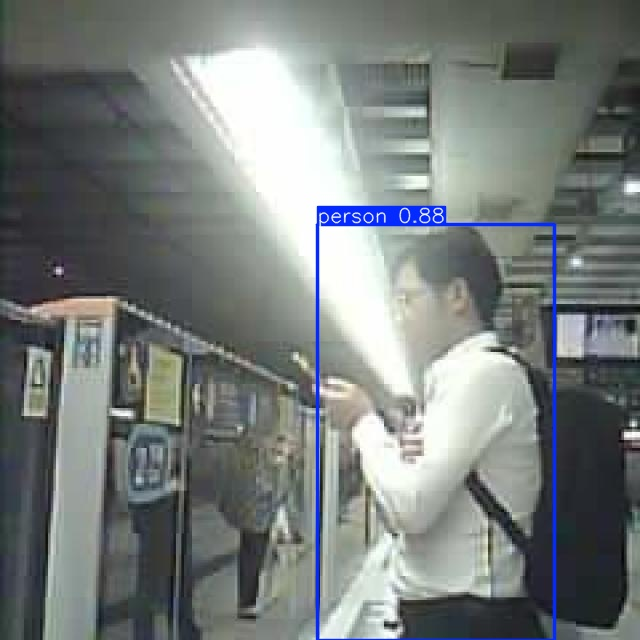

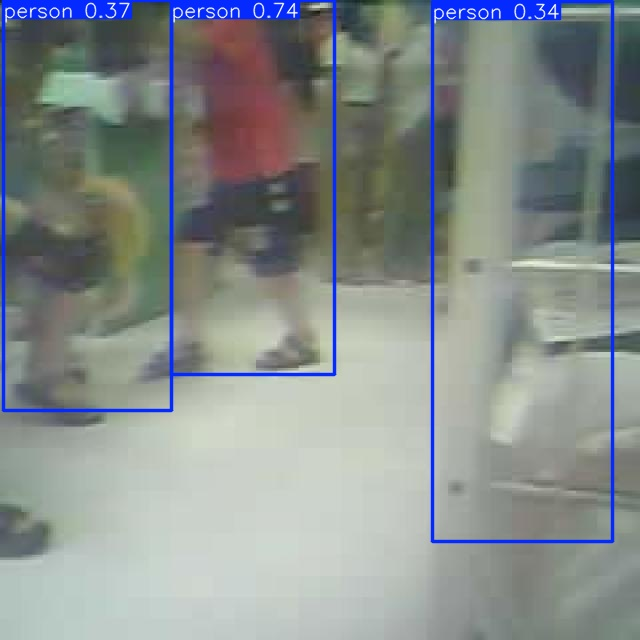

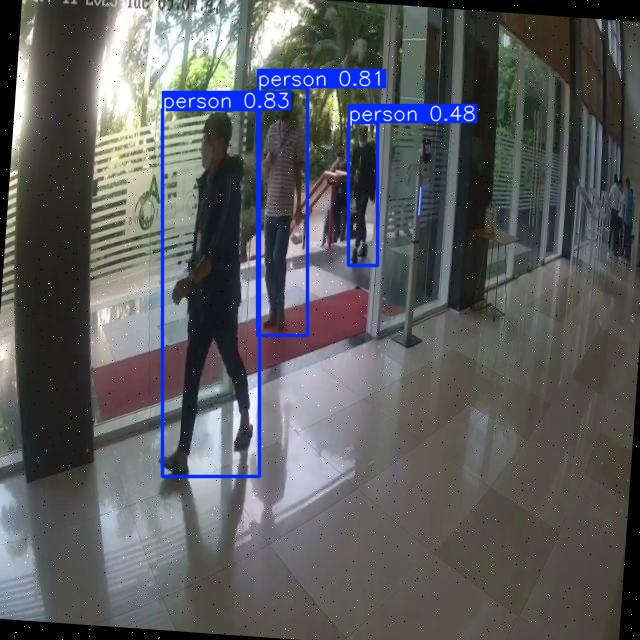

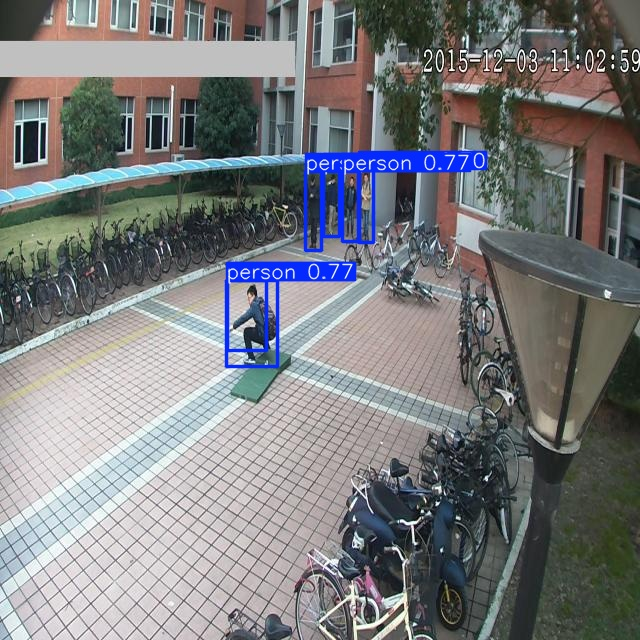

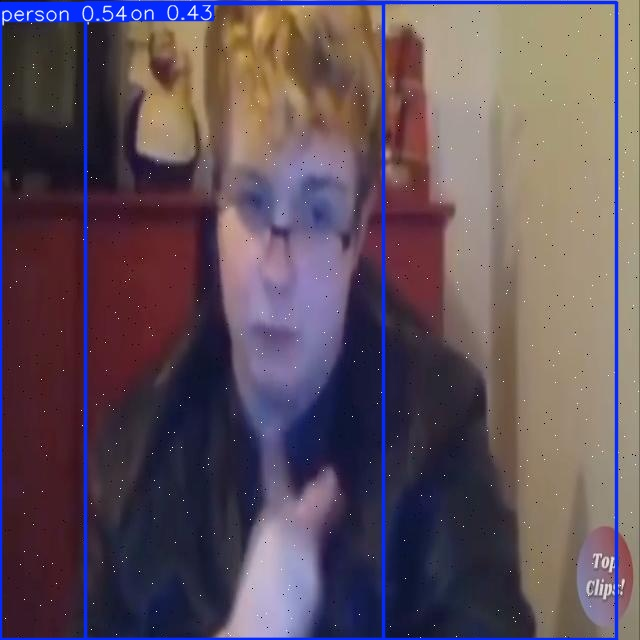

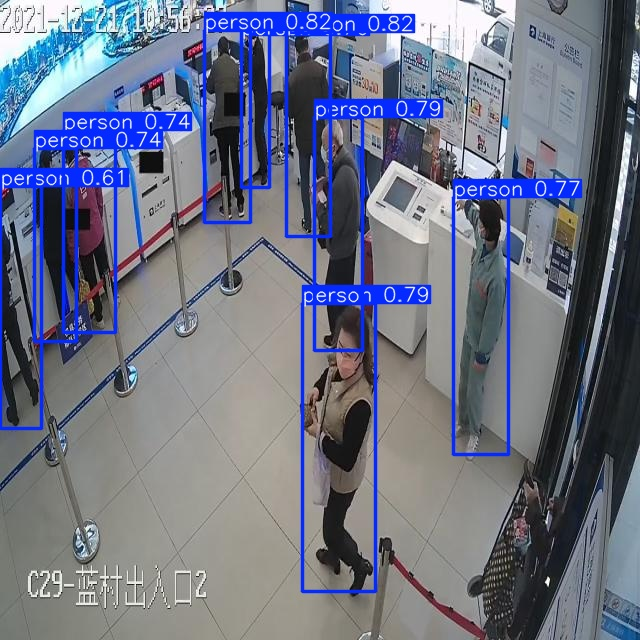

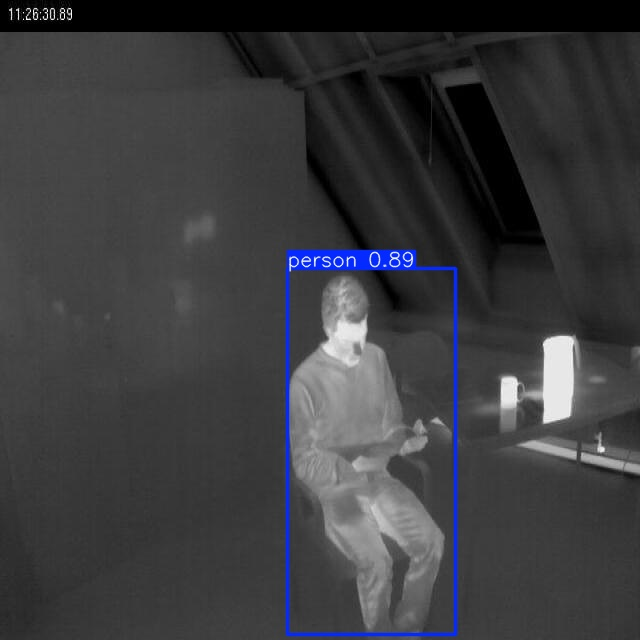

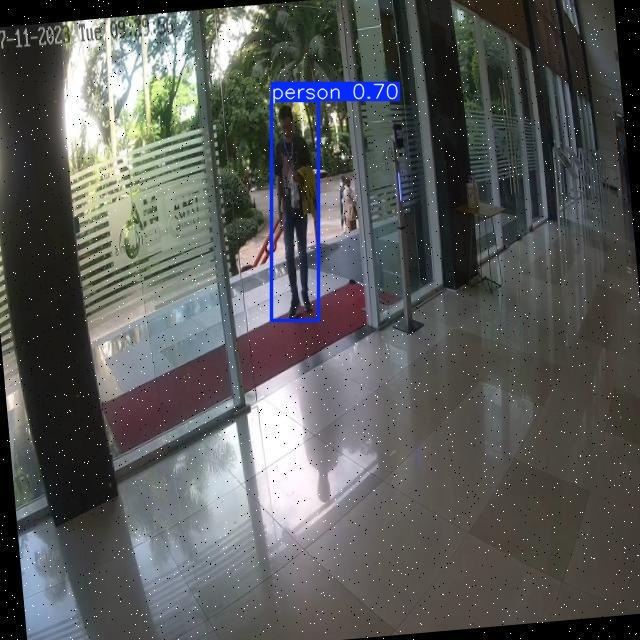

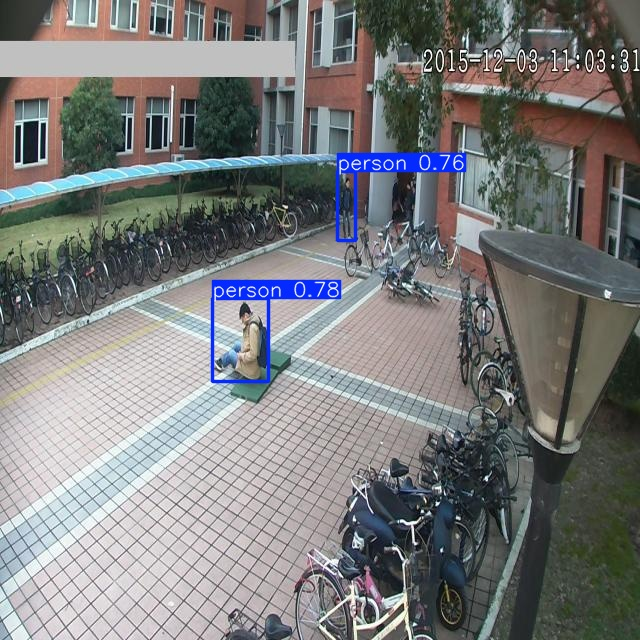

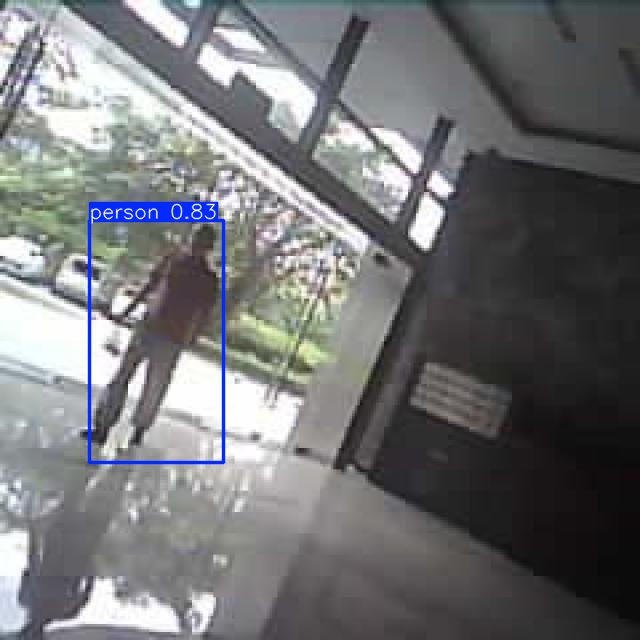

In [20]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")